In [1]:
#导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyecharts.charts import Map,Geo,Line
import pyecharts.options as opts

 # 1.导入五个城市的数据


In [2]:
df_bj = pd.read_csv('北京PM2.5.csv')
df_sh = pd.read_csv('上海PM2.5.csv')
df_gz = pd.read_csv('广州PM2.5.csv')
df_cd = pd.read_csv('成都PM2.5.csv')
df_sy = pd.read_csv('沈阳PM2.5.csv')

In [3]:
df_bj.tail(2)

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,PM_mean,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
52582,52583,2015,12,31,22,4,204.0,242.0,221.0,212.0,219.75,-10.0,73.0,1030.0,-6.0,NE,1.78,0.0,0.0
52583,52584,2015,12,31,23,4,NaN,NaN,NaN,235.0,235.00,-9.0,79.0,1029.0,-6.0,NE,2.67,0.0,0.0


## 1.2获取五个城市六年PM2.5的平均值
### 1.2.1北京

In [4]:
df_bj.columns

Index(['No', 'year', 'month', 'day', 'hour', 'season', 'PM_Dongsi',
       'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post', 'PM_mean', 'DEWP',
       'HUMI', 'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'],
      dtype='object')

In [5]:
bj_pm_mean = df_bj.loc[df_bj['PM_mean'].notnull(),['PM_mean']].mean() #为什么'PM_mean'不加[]是float类型，加了是Series类型

In [6]:
bj_pm_mean

PM_mean    95.183555
dtype: float64

In [7]:
bj_pm_mean.values

array([95.18355527])

In [8]:
bj_2 = df_bj.PM_mean.mean()
bj_2

95.18355527059875

### 1.2.2上海

In [9]:
df_sh.columns

Index(['No', 'year', 'month', 'day', 'hour', 'season', 'PM_Jingan',
       'PM_US Post', 'PM_Xuhui', 'PM_mean', 'DEWP', 'HUMI', 'PRES', 'TEMP',
       'cbwd', 'Iws', 'precipitation', 'Iprec'],
      dtype='object')

In [10]:
sh_pm_mean = df_sh.loc[df_sh['PM_mean'].notnull(),['PM_mean']].mean()
sh_pm_mean

PM_mean    54.838866
dtype: float64

### 1.2.3广州

In [11]:
gz_pm_mean = df_gz.loc[df_gz['PM_mean'].notnull(),['PM_mean']].mean()
gz_pm_mean

PM_mean    51.130994
dtype: float64

In [12]:
df_gz.tail()

,No,year,month,day,hour,season,PM_City Station,PM_5th Middle School,PM_US Post,PM_mean,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
52579,52580,2015,12,31,19,4.0,59.0,56.0,59.0,58.000000,11.0,80.0,1018.299988,14.4,NW,10.9,0.0,0.0
52580,52581,2015,12,31,20,4.0,58.0,57.0,58.0,57.666667,11.4,82.0,1018.700012,14.5,NW,12.9,0.0,0.0
52581,52582,2015,12,31,21,4.0,60.0,56.0,60.0,58.666667,11.1,78.0,1019.300000,14.9,NW,14.7,0.0,0.0
52582,52583,2015,12,31,22,4.0,60.0,57.0,60.0,59.000000,10.4,75.0,1019.500000,14.8,NW,15.9,0.0,0.0
52583,52584,2015,12,31,23,NaN,63.0,NaN,63.0,63.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2.4成都

In [13]:
cd_pm_mean = df_cd.loc[df_cd['PM_mean'].notnull(),['PM_mean']].mean()
cd_pm_mean

PM_mean    79.8612
dtype: float64

In [14]:
df_cd.head(2)

,No,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,PM_mean,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,4.0,81.20,1022.0,7.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,4.0,86.99,1022.0,6.0,cv,1.0,0.0,0.0


 ### 1.2.5沈阳

In [15]:
sy_pm_mean = df_sy.loc[df_gz['PM_mean'].notnull(),['PM_mean']].mean()
sy_pm_mean

PM_mean    78.509795
dtype: float64

In [16]:
df_sy.head(2)

,No,year,month,day,hour,season,PM_Taiyuanjie,PM_US Post,PM_Xiaoheyan,PM_mean,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-26.0,69.79,1024.0,-22.0,NE,1.0289,NaN,NaN
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-26.0,76.26,1024.0,-23.0,NE,2.5722,NaN,NaN


# 2.绘制地理分布图

In [17]:
#创建地理分布图的对象
geo = Geo()
#添加中国地图
geo.add_schema(maptype='china')
#添加数据
geo.add('PM2.5',[['北京',bj_pm_mean],['上海',sh_pm_mean],['广州',gz_pm_mean],['成都',cd_pm_mean],['沈阳',sy_pm_mean]])
#去掉标识[热力值数据]
geo.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
#显示左下角的颜色控制
#geo.set_global_opts(visualmap_opts=opts.VisualMapOpts(is_piecewise=True),title_opts=opts.TitleOpts(title='北上广成沈五城市PM2.5平均值'))
#绘制图形
geo.render_notebook()#不加_notebook会生成一个html文件

# 3.1计算五个城市PM2.5年平均值

- 北京

In [18]:
df_bj.columns

Index(['No', 'year', 'month', 'day', 'hour', 'season', 'PM_Dongsi',
       'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post', 'PM_mean', 'DEWP',
       'HUMI', 'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'],
      dtype='object')

In [19]:
# 按照年分组查询 查询四个测点平均值的平均值
bj_year_pm_mean = df_bj['PM_mean'].groupby(df_bj['year']).mean()

- 上海

In [20]:
sh_year_pm_mean = df_sh['PM_mean'].groupby(df_sh['year']).mean()

In [21]:
sh_year_pm_mean

year
2010          NaN
2011    68.090909
2012    50.862399
2013    62.752275
2014    52.602334
2015    52.886726
Name: PM_mean, dtype: float64

- 广州

In [22]:
gz_year_pm_mean = df_gz['PM_mean'].groupby(df_gz['year']).mean()

In [23]:
gz_year_pm_mean

year
2010          NaN
2011    73.110368
2012    57.746457
2013    55.275342
2014    50.653666
2015    40.436641
Name: PM_mean, dtype: float64

- 成都

In [24]:
cd_year_pm_mean_notnull = df_cd.loc[df_cd['PM_mean'].notnull(),'PM_mean'].groupby(df_cd['year']).mean()

In [25]:
cd_year_pm_mean_notnull

year
2012    84.988206
2013    95.874335
2014    76.891282
2015    64.562005
Name: PM_mean, dtype: float64

In [26]:
cd_year_pm_mean = df_cd['PM_mean'].groupby(df_cd['year']).mean()

In [27]:
cd_year_pm_mean

year
2010          NaN
2011          NaN
2012    84.988206
2013    95.874335
2014    76.891282
2015    64.562005
Name: PM_mean, dtype: float64

- 沈阳

In [28]:
sy_year_pm_mean = df_sy['PM_mean'].groupby(df_sy['year']).mean()

In [29]:
sy_year_pm_mean

year
2010          NaN
2011          NaN
2012          NaN
2013    82.792754
2014    77.438699
2015    74.848530
Name: PM_mean, dtype: float64

## 绘图

# 3.2 分析五城市污染状态

In [30]:
#返回污染等级占该城市小时数比例函数
def pct_pol_level(data_arr):
    level_1 = data_arr[data_arr <= 35].shape[0]
    level_2 = data_arr[data_arr <= 75].shape[0]
    level_3 = data_arr[(75 < data_arr) & (data_arr <= 115)].shape[0]
    level_4 = data_arr[(15 < data_arr) & (data_arr <= 150)].shape[0]
    level_5 = data_arr[(150 < data_arr) & (data_arr <= 250)].shape[0]
    level_6 = data_arr[data_arr > 250].shape[0]
    levels = np.array([level_1, level_2, level_3, level_4, level_5, level_6])
    print(levels)
    result = levels / np.sum(levels)
    print(result)
    return result

In [31]:
#计算出每个城市每个污染等级的比例
bj_degree = pct_pol_level(df_bj['PM_mean'])
sh_degree = pct_pol_level(df_sh['PM_mean'])
gz_degree = pct_pol_level(df_gz['PM_mean'])
cd_degree = pct_pol_level(df_cd['PM_mean'])
sy_degree = pct_pol_level(df_sy['PM_mean'])

[15449 26922  8554 33570  6915  3461]
[0.16284218 0.28377481 0.09016454 0.35384891 0.07288845 0.03648112]
[13924 27197  4555 30415  1243   159]
[0.17968075 0.35096073 0.0587795  0.39248706 0.01604016 0.0020518 ]
[13079 26852  4733 29811   623    45]
[0.1740548  0.35734533 0.06298657 0.39672358 0.00829086 0.00059886]
[ 5860 18020  6458 26410  2828   566]
[0.09743607 0.29962422 0.1073792  0.4391274  0.04702205 0.00941106]
[ 7627 16413  4459 21182  2251   851]
[0.14449728 0.31095239 0.08447796 0.40130345 0.04264631 0.01612262]


In [32]:
#应该转换成每组数据是同一污染等级的
#five_degree = pd.DataFrame()
degree_df = pd.DataFrame(bj_degree,index = ['优','良','轻度污染','中度污染','重度污染','严重污染'],columns = ['北京'])
degree_df.insert(1,'上海',sh_degree)
degree_df.insert(2,'广州',gz_degree)
degree_df.insert(3,'成都',cd_degree)
degree_df.insert(4,'沈阳',sy_degree)
degree_df

,北京,上海,广州,成都,沈阳
优,0.162842,0.179681,0.174055,0.097436,0.144497
良,0.283775,0.350961,0.357345,0.299624,0.310952
轻度污染,0.090165,0.058780,0.062987,0.107379,0.084478
中度污染,0.353849,0.392487,0.396724,0.439127,0.401303
重度污染,0.072888,0.016040,0.008291,0.047022,0.042646
严重污染,0.036481,0.002052,0.000599,0.009411,0.016123


Text(0.5, 0, '城市')

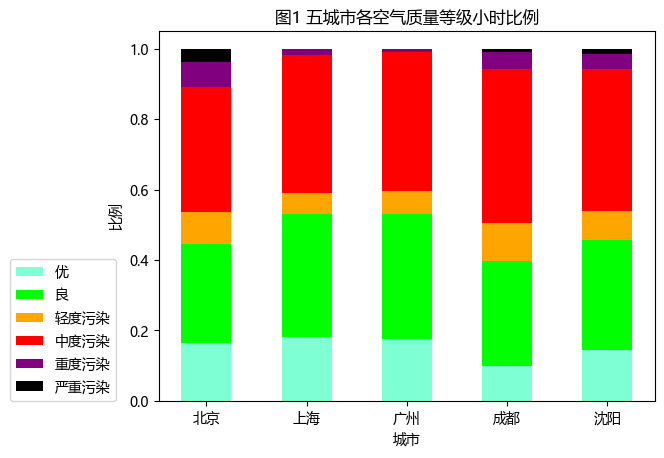

In [33]:
#画堆叠柱状图
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.figure()
labels = degree_df.columns
plt.title("图1 五城市各空气质量等级小时比例")

plt.bar(labels,degree_df.loc['优'],color = 'aquamarine',width = 0.5,label='优')
plt.bar(labels,degree_df.loc['良'],color = 'lime',width = 0.5,bottom=degree_df.loc['优'],label='良')
plt.bar(labels,degree_df.loc['轻度污染'],color = 'orange',width = 0.5,bottom=degree_df.loc['优']+degree_df.loc['良'],label='轻度污染')
plt.bar(labels,degree_df.loc['中度污染'],color = 'r',width = 0.5,bottom=degree_df.loc['优']+degree_df.loc['良']+degree_df.loc['轻度污染'],label='中度污染')
plt.bar(labels,degree_df.loc['重度污染'],color ='purple' ,width = 0.5,bottom=degree_df.loc['优']+degree_df.loc['良']+degree_df.loc['轻度污染']+degree_df.loc['中度污染'],label='重度污染')
plt.bar(labels,degree_df.loc['严重污染'],color = 'black',width = 0.5,bottom=degree_df.loc['优']+degree_df.loc['良']+degree_df.loc['轻度污染']+degree_df.loc['中度污染']+degree_df.loc['重度污染'],label='严重污染')
plt.legend(loc=(-0.3,0))
plt.ylabel('比例')
plt.xlabel('城市')

# 3.3五城市每个区空气质量的月度差异

In [34]:
df_bj.head()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,PM_mean,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


In [35]:
#分别对每个城市数据按区进行合并，为数据添加新列。
'''
北京：监测点1-东四：东城区 监测点2-东四环：朝阳区 监测点3-农展馆：朝阳区 监测点3-US Post：朝阳区
上海：监测点1-静安：静安区 监测点2-US Post：徐汇区 监测点3-徐汇：徐汇区
广州：监测点1-City Station：黄埔区 监测点2-第5中学：海珠区 监测点3-US Post：天河区
成都：监测点1-草堂寺：青羊区 监测点2沙河铺-：锦江区 监测点3- US Post：武侯区
沈阳：监测点1-太原街：和平区 监测点2- US Post：和平区 监测点3-：沈河区
（注：US Post点位以美国领事馆所在区确定）
'''

'\n北京：监测点1-东四：东城区 监测点2-东四环：朝阳区 监测点3-农展馆：朝阳区 监测点3-US Post：朝阳区\n上海：监测点1-静安：静安区 监测点2-US Post：徐汇区 监测点3-徐汇：徐汇区\n广州：监测点1-City Station：黄埔区 监测点2-第5中学：海珠区 监测点3-US Post：天河区\n成都：监测点1-草堂寺：青羊区 监测点2沙河铺-：锦江区 监测点3- US Post：武侯区\n沈阳：监测点1-太原街：和平区 监测点2- US Post：和平区 监测点3-：沈河区\n（注：US Post点位以美国领事馆所在区确定）\n'

北京

In [36]:
df_bj['东城区'] = df_bj['PM_Dongsi']

In [37]:
df_bj['朝阳区'] = df_bj.loc[:,['PM_Dongsihuan','PM_Nongzhanguan','PM_US Post']].mean(axis=1)

In [38]:
df_bj.tail(5)

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,...,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,东城区,朝阳区
52579,52580,2015,12,31,19,4,140.0,157.0,122.0,133.0,...,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0,140.0,137.333333
52580,52581,2015,12,31,20,4,157.0,199.0,149.0,169.0,...,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0,157.0,172.333333
52581,52582,2015,12,31,21,4,171.0,231.0,196.0,203.0,...,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0,171.0,210.000000
52582,52583,2015,12,31,22,4,204.0,242.0,221.0,212.0,...,-10.0,73.0,1030.0,-6.0,NE,1.78,0.0,0.0,204.0,225.000000
52583,52584,2015,12,31,23,4,NaN,NaN,NaN,235.0,...,-9.0,79.0,1029.0,-6.0,NE,2.67,0.0,0.0,NaN,235.000000


In [39]:
df_bj_dc = df_bj['东城区'].groupby(df_bj['month']).mean()
df_bj_cy = df_bj['朝阳区'].groupby(df_bj['month']).mean()

In [40]:
df_bj_cy

month
1     111.663550
2     118.332716
3      95.037902
4      82.092525
5      76.260369
6      89.963160
7      89.033280
8      74.971674
9      77.598037
10    112.496722
11    110.136929
12    108.664050
Name: 朝阳区, dtype: float64

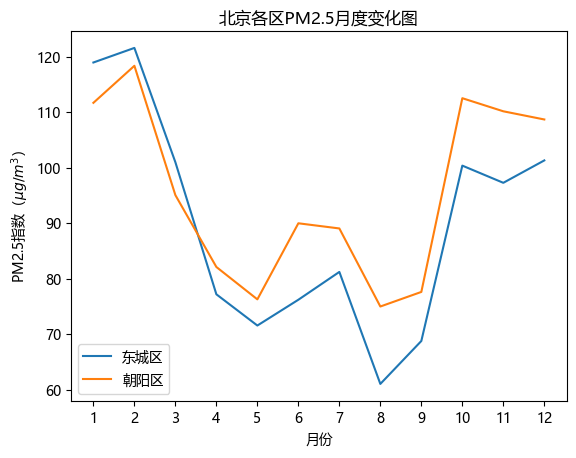

In [41]:
plt.figure()
plt.plot(df_bj_dc,label='东城区')
plt.plot(df_bj_cy,label='朝阳区')
plt.xticks(range(1,13,1))
plt.title('北京各区PM2.5月度变化图')
plt.xlabel('月份')
plt.ylabel('PM2.5指数（$\mu g/m^3 $）')
plt.legend(loc = 3)

上海

In [42]:
df_sh.head(2)

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,PM_mean,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0


In [43]:
df_sh['静安区']=df_sh['PM_Jingan']
df_sh['徐汇区']=df_sh.iloc[:,7:9].mean(axis=1)

In [44]:
df_sh_ja = df_sh['静安区'].groupby(df_sh['month']).mean()
df_sh_xh = df_sh['徐汇区'].groupby(df_sh['month']).mean()

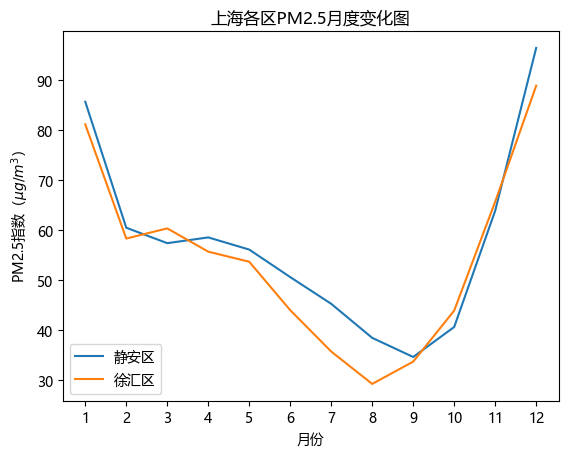

In [45]:
plt.figure()
plt.plot(df_sh_ja,label='静安区')
plt.plot(df_sh_xh,label='徐汇区')
plt.xticks(range(1,13,1))
plt.title('上海各区PM2.5月度变化图')
plt.xlabel('月份')
plt.ylabel('PM2.5指数（$\mu g/m^3 $）')
plt.legend(loc = 3)

广州

In [46]:
df_gz.head(2)

,No,year,month,day,hour,season,PM_City Station,PM_5th Middle School,PM_US Post,PM_mean,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4.0,NaN,NaN,NaN,NaN,9.4,76.0,1015.1,13.5,NW,0.8,0.0,0.0
1,2,2010,1,1,1,4.0,NaN,NaN,NaN,NaN,10.2,83.0,1015.2,13.0,cv,0.5,0.0,0.0


In [47]:
df_gz['PM_City Station']==df_gz['PM_US Post']

0        False
1        False
2        False
3        False
4        False
         ...  
52579     True
52580     True
52581     True
52582     True
52583     True
Length: 52584, dtype: bool

In [48]:
df_gz['黄埔区']=df_gz['PM_City Station']
df_gz['海珠区']=df_gz['PM_5th Middle School']
df_gz['天河区']=df_gz['PM_US Post']
df_gz_hp = df_gz['黄埔区'].groupby(df_gz['month']).mean()
df_gz_hz = df_gz['海珠区'].groupby(df_gz['month']).mean()
df_gz_th = df_gz['天河区'].groupby(df_gz['month']).mean()

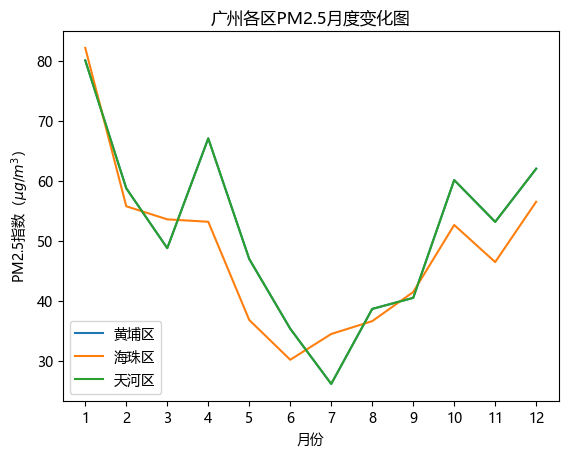

In [49]:
plt.figure()
plt.plot(df_gz_hp,label='黄埔区')
plt.plot(df_gz_hz,label='海珠区')
plt.plot(df_gz_th,label='天河区')
plt.xticks(range(1,13,1))
plt.title('广州各区PM2.5月度变化图')
plt.xlabel('月份')
plt.ylabel('PM2.5指数（$\mu g/m^3 $）')
plt.legend(loc = 3)

成都

In [50]:
df_cd.head(2)

,No,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,PM_mean,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,4.0,81.20,1022.0,7.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,4.0,86.99,1022.0,6.0,cv,1.0,0.0,0.0


In [51]:
df_cd['青羊区']=df_cd['PM_Caotangsi']
df_cd['锦江区']=df_cd['PM_Shahepu']
df_cd['武侯区']=df_cd['PM_US Post']
df_cd_qy = df_cd['青羊区'].groupby(df_cd['month']).mean()
df_cd_jj = df_cd['锦江区'].groupby(df_cd['month']).mean()
df_cd_wh = df_cd['武侯区'].groupby(df_cd['month']).mean()

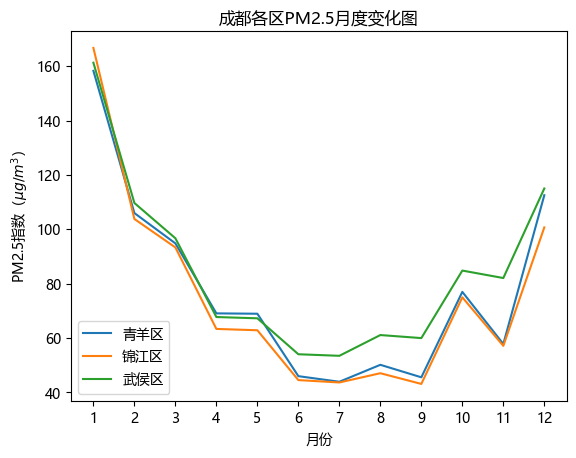

In [52]:
plt.figure()
plt.plot(df_cd_qy,label='青羊区')
plt.plot(df_cd_jj,label='锦江区')
plt.plot(df_cd_wh,label='武侯区')
plt.xticks(range(1,13,1))
plt.title('成都各区PM2.5月度变化图')
plt.xlabel('月份')
plt.ylabel('PM2.5指数（$\mu g/m^3 $）')
plt.legend(loc = 3)

沈阳

In [53]:
df_sy.head(2)

,No,year,month,day,hour,season,PM_Taiyuanjie,PM_US Post,PM_Xiaoheyan,PM_mean,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-26.0,69.79,1024.0,-22.0,NE,1.0289,NaN,NaN
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-26.0,76.26,1024.0,-23.0,NE,2.5722,NaN,NaN


In [54]:
df_sy['和平区']=df_sy.iloc[:,6:8].mean(axis=1)
df_sy['沈河区']=df_sy['PM_Xiaoheyan']
df_sy_hp = df_sy['和平区'].groupby(df_sy['month']).mean()
df_sy_sh = df_sy['沈河区'].groupby(df_sy['month']).mean()

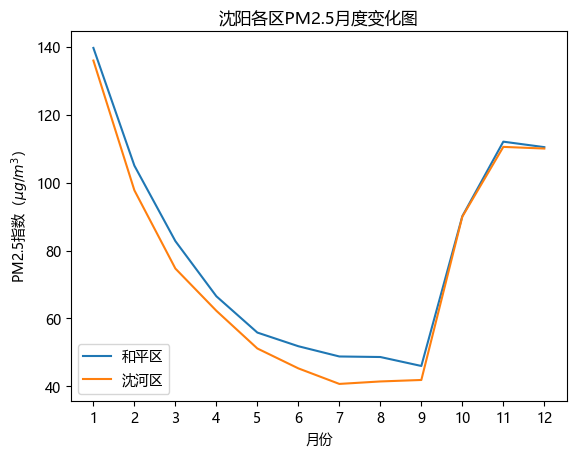

In [55]:
plt.figure()
plt.plot(df_sy_hp,label='和平区')
plt.plot(df_sy_sh,label='沈河区')
plt.xticks(range(1,13,1))
plt.title('沈阳各区PM2.5月度变化图')
plt.xlabel('月份')
plt.ylabel('PM2.5指数（$\mu g/m^3 $）')
plt.legend(loc = 3)

# 3.4统计每个城市每天的平均PM2.5的数值

[Text(0, 0, '95.1836'),
 Text(0, 0, '54.8389'),
 Text(0, 0, '51.131'),
 Text(0, 0, '79.8612'),
 Text(0, 0, '78.5098')]

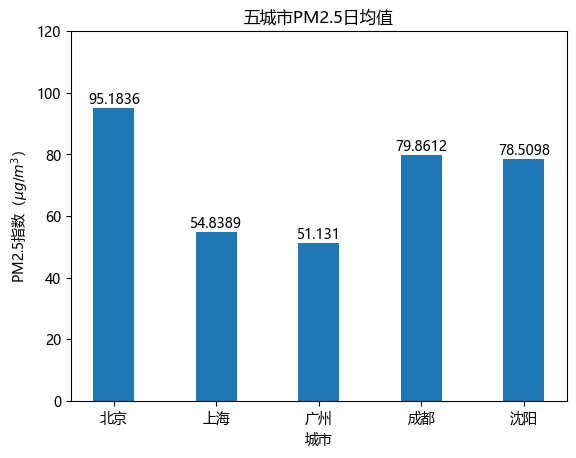

In [56]:
fig = plt.figure()
labels = ['北京','上海','广州','成都','沈阳']
x=np.arange(5)
day_mean_np = np.append(bj_pm_mean.values,sh_pm_mean.values)
day_mean_np = np.append(day_mean_np,gz_pm_mean.values)
day_mean_np = np.append(day_mean_np,cd_pm_mean.values)
day_mean_np = np.append(day_mean_np,sy_pm_mean.values)
day_mean_np 
bar = plt.bar(labels,day_mean_np,width = 0.4)
plt.title("五城市PM2.5日均值")
plt.yticks(range(0,140,20))
plt.ylabel("PM2.5指数（$\mu g/m^3 $）")
plt.xlabel("城市")
plt.bar_label(bar)#显示每组数据数值
#plt.bar(x,[bj_pm_mean.values.astype(float),sh_pm_mean.values.astype(float),gz_pm_mean.values.astype(float),cd_pm_mean.values.astype(float),sy_pm_mean.values.astype(float)])

In [57]:
#创建折线图对象
#line = Line()
#line.add_xaxis(xaxis_data = [''.format(i,'年') for i in range(2010,2016)])
#line.add_yaxis([['北京',bj_year_pm_mean],['上海',sh_year_pm_mean],['广州',gz_year_pm_mean],['成都',cd_year_pm_mean],['沈阳',sy_year_pm_mean]])
#line.render_notebook()xx

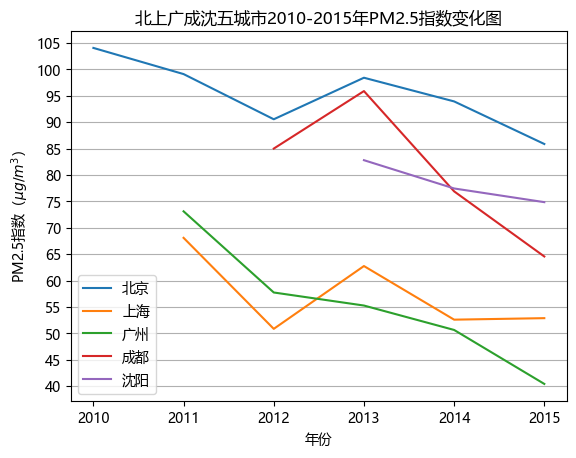

In [58]:
fig=plt.figure()
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

plt.plot(bj_year_pm_mean.index,bj_year_pm_mean,label='北京')
plt.plot(bj_year_pm_mean.index,sh_year_pm_mean,label='上海')
plt.plot(bj_year_pm_mean.index,gz_year_pm_mean,label='广州')
plt.plot(bj_year_pm_mean.index,cd_year_pm_mean,label='成都')
plt.plot(sy_year_pm_mean.index,sy_year_pm_mean,label='沈阳')
plt.xlabel('年份')
plt.ylabel('PM2.5指数（$\mu g/m^3 $）')
plt.title('北上广成沈五城市2010-2015年PM2.5指数变化图')
plt.grid(axis='y')
plt.yticks(range(40,110,5))
plt.legend()

# 3.5基于天数对比中国环保部和美国驻华大使馆统计的污染状态

In [59]:
#添加数据列：中国环保部
df_bj.head(2)
df_sh.head(2)


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,PM_mean,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,静安区,徐汇区
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0,NaN,NaN
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0,NaN,NaN


In [60]:
#编写函数，统计各污染状态天数
def num_pol_level(data_arr):
    level_A = data_arr[data_arr <= 75].shape[0]
    level_B = data_arr[data_arr > 75].shape[0]
    levels = np.array([level_A, level_B])
    return levels

In [61]:
#添加新列，中国统计数据
df_bj['PM_CN']=df_bj.iloc[:,6:9].mean(axis=1)
df_sh['PM_CN']=df_sh.iloc[:,[6,8]].mean(axis=1)
df_gz['PM_CN']=df_gz.iloc[:,6:8].mean(axis=1)
df_cd['PM_CN']=df_cd.iloc[:,6:8].mean(axis=1)
df_sy['PM_CN']=df_sy.iloc[:,[6,8]].mean(axis=1)

In [62]:
#按天分组
day_bj = df_bj.groupby(['year','month','day']).mean()
day_sh = df_sh.groupby(['year','month','day']).mean()
day_gz = df_gz.groupby(['year','month','day']).mean()
day_cd = df_cd.groupby(['year','month','day']).mean()
day_sy = df_sy.groupby(['year','month','day']).mean()

In [63]:
bj_cn = num_pol_level(day_bj['PM_CN'])
sh_cn = num_pol_level(day_sh['PM_CN'])
gz_cn = num_pol_level(day_gz['PM_CN'])
cd_cn = num_pol_level(day_cd['PM_CN'])
sy_cn = num_pol_level(day_sy['PM_CN'])
bj_us = num_pol_level(day_bj['PM_US Post'])
sh_us = num_pol_level(day_sh['PM_US Post'])
gz_us = num_pol_level(day_gz['PM_US Post'])
cd_us = num_pol_level(day_cd['PM_US Post'])
sy_us = num_pol_level(day_sy['PM_US Post'])

In [64]:
sh_cn

array([831, 264])

In [65]:
bj_cn

array([584, 495])

In [66]:
df_cn = pd.DataFrame(bj_cn,columns=['北京'])

In [67]:
df_cn.insert(1,'上海',sh_cn)
df_cn.insert(2,'广州',gz_cn)
df_cn.insert(3,'成都',cd_cn)
df_cn.insert(4,'沈阳',sy_cn)

In [68]:
df_cn

,北京,上海,广州,成都,沈阳
0,584,831,1159,679,691
1,495,264,257,414,398


In [69]:
df_us = pd.DataFrame(bj_us,columns=['北京'])

In [70]:
df_us.insert(1,'上海',sh_us)
df_us.insert(2,'广州',gz_us)
df_us.insert(3,'成都',cd_us)
df_us.insert(4,'沈阳',sy_us)

In [71]:
df_us

,北京,上海,广州,成都,沈阳
0,1078,1173,1139,697,592
1,1077,282,258,549,341


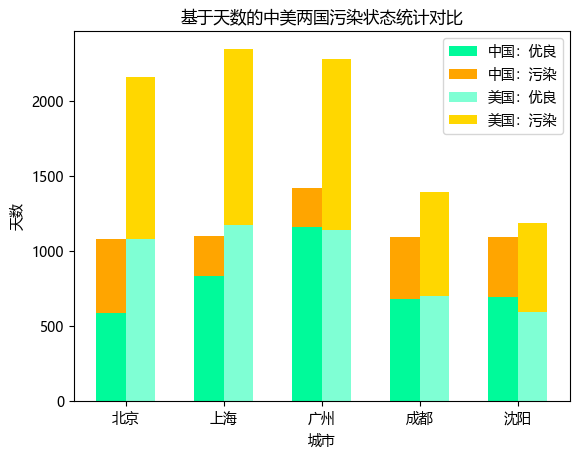

In [72]:
plt.figure()
x = np.arange(1,6)
plt.bar(x-0.15,df_cn.iloc[0,:],color = 'mediumspringgreen',width=0.3,label='中国：优良')
plt.bar(x-0.15,df_cn.iloc[1,:],color = 'orange',bottom =df_cn.iloc[0,:],width=0.3,label='中国：污染' )
plt.bar(x+0.15,df_us.iloc[0,:],color = 'aquamarine',width=0.3,label='美国：优良')
plt.bar(x+0.15,df_us.iloc[0,:],color = 'gold',bottom=df_us.iloc[0,:],width=0.3,label='美国：污染')
plt.xticks(x,['北京','上海','广州','成都','沈阳'])
plt.title('基于天数的中美两国污染状态统计对比')
plt.xlabel('城市')
plt.ylabel('天数')
plt.legend()